<a href="https://colab.research.google.com/github/desireesosa/EDPII/blob/main/MetodoCrank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ecuación del Calor. Método implícito de Crank-Nicolson**

*Resolver el problema propuesto en la imagen adjunta usando el método de Crank-Nicolson.*

*Use h = 1/10.*
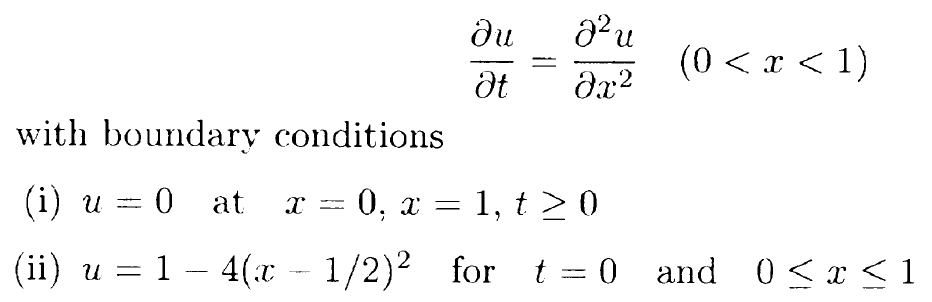

*Escriba un programa que implemente el método de Crank-Nicolson usando la librería sympy y basándose en la notebook proporcionada en la tarea anterior. Siga la estructura y pasos similares a los que se plantearon para el método de Richardson. Explique cualquier desviación mayor respecto a ella.*

***Los ejercicios son los siguientes:***



1.   Obtenga una tabla similar a la tabla 2.6 de la imagen adjunta y use esta para verificar que su código es correcto. Observe hasta que valor de t llega. Use la librería tabulate.Elemento de la lista
2.   La tabla 2.7 de la imagen adjunta contiene los valores reales de la solución. Use su código para graficar en un mismo panel su solución numérica y la solución real. Determine el error de su solución.



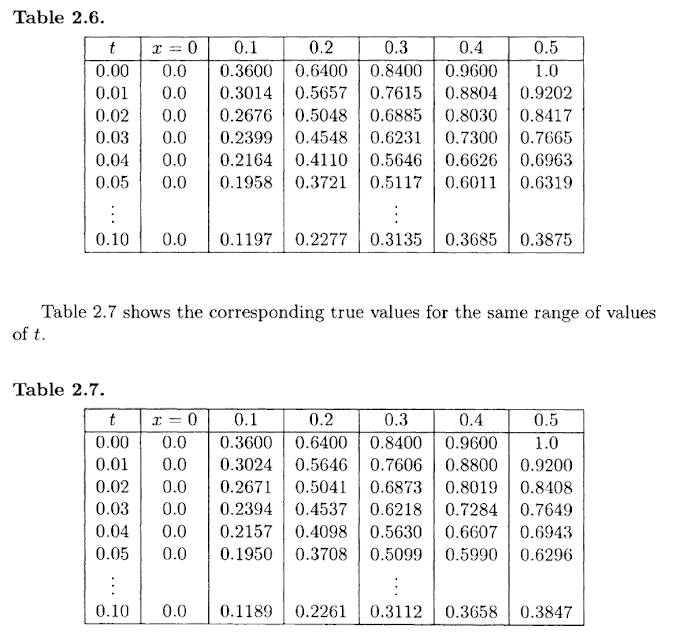

In [ ]:
#programa que implemente el método de Crank-Nicolson
#usando la librería sympy y basándose en la notebook proporcionada

import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from tabulate import tabulate


In [ ]:
h=0.1
k=0.01
r=k/h**2
x_vals=np.arange(0, 1+h, h)
N=len(x_vals)-2


In [ ]:
def u0(x):
  return 1-4*(x-0.5)**2
u_n=np.array([u0(x) for x in x_vals])

j=sp.symbols("j")
A=sp.zeros(N)
B=sp.zeros(N)

for i in range(N):
    for j2 in range(N):
        if i == j2:
            A[i, j2] = 1 + r
            B[i, j2] = 1 - r
        elif abs(i - j2) == 1:
            A[i, j2] = -r/2
            B[i, j2] = r/2
        else:
            A[i, j2] = 0
            B[i, j2] = 0

A = sp.Matrix(A)
B = sp.Matrix(B)

A_inv = A.inv()

tabla_num = []
t = 0
tabla_num.append([t] + list(u_n[0:6]))

# número de pasos
Nt = int(0.10/k)

u_int = sp.Matrix(u_n[1:-1])

for n in range(Nt):
    t += k
    rhs = B*u_int
    u_int = A_inv * rhs

    u_n = np.zeros_like(u_n)
    u_n[1:-1] = np.array(u_int, dtype=float).flatten()

    tabla_num.append([round(t, 2)] + list(u_n[0:6]))

#Tabla 2.6
headers = ["t", "x=0", "0.1", "0.2", "0.3", "0.4", "0.5"]
print(tabulate(tabla_num, headers=headers, floatfmt=".4f"))


     t     x=0     0.1     0.2     0.3     0.4     0.5
------  ------  ------  ------  ------  ------  ------
0.0000  0.0000  0.3600  0.6400  0.8400  0.9600  1.0000
0.0100  0.0000  0.3014  0.5657  0.7615  0.8804  0.9202
0.0200  0.0000  0.2676  0.5048  0.6885  0.8030  0.8417
0.0300  0.0000  0.2399  0.4548  0.6231  0.7300  0.7665
0.0400  0.0000  0.2164  0.4110  0.5646  0.6626  0.6963
0.0500  0.0000  0.1958  0.3721  0.5117  0.6011  0.6319
0.0600  0.0000  0.1773  0.3372  0.4639  0.5452  0.5731
0.0700  0.0000  0.1607  0.3056  0.4206  0.4943  0.5197
0.0800  0.0000  0.1457  0.2771  0.3813  0.4482  0.4713
0.0900  0.0000  0.1321  0.2512  0.3457  0.4064  0.4273
0.1000  0.0000  0.1197  0.2277  0.3135  0.3685  0.3875


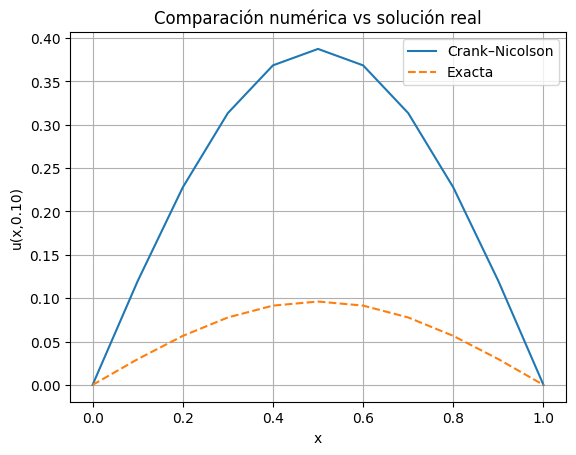

Error máximo (norma infinito): 0.29129048170690136


In [16]:
def u_exact(x_val, t_val, terms=50):
    s = 0
    for n in range(1, 2 * terms, 2): # n takes odd values 1, 3, 5, ...
        Bn = 8 / (n * np.pi)**3
        s += Bn * np.sin(n * np.pi * x_val) * np.exp(-(n * np.pi)**2 * t_val)
    return s

#graficando
t_plot=0.10
u_real=np.array([u_exact(x_val, t_plot) for x_val in x_vals])
# Use the last full numerical solution (u_n) directly for plotting
u_numeric = u_n


plt.plot(x_vals, u_numeric, label="Crank–Nicolson")
plt.plot(x_vals, u_real, label="Exacta", linestyle="--")
plt.legend()
plt.xlabel("x")
plt.ylabel("u(x,0.10)")
plt.title("Comparación numérica vs solución real")
plt.grid()
plt.show()

error_max = np.max(np.abs(u_numeric - u_real))
print("Error máximo (norma infinito):", error_max)